# Trabajo Práctico N° 2: Redes Neuronales
## Natalia Mellino - Introducción al Aprendizaje Automatizado

In [1]:
# imports here

import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from copy import deepcopy
import matplotlib.pyplot as plt
import espirales_anidadas
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

In [2]:
#defino parámetros de la red
epocas_por_entrenamiento=25    #numero de epocas que entrena cada vez
eta=0.01              #learning rate
alfa=0.9               #momentum
N2=60                 #neuronas en la capa oculta

#defino MLP para regresión
regr = MLPRegressor(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant', learning_rate_init=eta,momentum=alfa,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas_por_entrenamiento)
#defino MLP para clasificación
clasif = MLPClassifier(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant', learning_rate_init=eta,momentum=alfa,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas_por_entrenamiento)
print(regr)

MLPRegressor(activation='logistic', alpha=0.0, batch_size=1,
             hidden_layer_sizes=(60,), learning_rate_init=0.01, max_iter=25,
             nesterovs_momentum=False, solver='sgd', tol=0.0, warm_start=True)


In [10]:
# Entrenar red para REGRESION

def entrenar_red_regresion(red, evaluaciones, X_train, y_train, X_val, y_val, X_test, y_test):
    best_red = None
    best_error = None
    error_train = []
    error_val = []
    error_test = []
    for i in range(evaluaciones):
        # Entrenamos
        model = red.fit(X_train, y_train)
        # Predecimos
        pred_train = model.predict(X_train)
        pred_val = model.predict(X_val)
        pred_test = model.predict(X_test)
        # Guardamos error y vemos si la red que tenemos es mejor que la anterior
        current_error_train = sk.metrics.mean_squared_error(y_train, pred_train)
        current_error_val = sk.metrics.mean_squared_error(y_val, pred_val)
        current_error_test = sk.metrics.mean_squared_error(y_test, pred_test)

        if best_error is None or current_error_val < best_error:
            best_error = current_error_val 
            best_red = deepcopy(model)
        error_train.append(current_error_train)
        error_test.append(current_error_test)
        error_val .append(current_error_val)

    return best_red, error_train, error_val, error_test

In [9]:
# Entrenar red para CLASIFICACIÓN

def entrenar_red_clasificacion(red, evaluaciones, X_train, y_train, X_val, y_val, X_test, y_test):
    best_red = None
    best_error = None
    error_train = []
    error_val = []
    error_test = []
    for i in range(evaluaciones):
        # Entrenamos
        model = red.fit(X_train, y_train)
        # Predecimos
        pred_train = model.predict(X_train)
        pred_val = model.predict(X_val)
        pred_test = model.predict(X_test)
        # Guardamos error y vemos si la red que tenemos es mejor que la anterior
        current_error_train = sk.metrics.zero_one_loss(y_train, pred_train)
        current_error_val = sk.metrics.zero_one_loss(y_val, pred_val)
        current_error_test = sk.metrics.zero_one_loss(y_test, pred_test)

        if best_error is None or current_error_val < best_error:
            best_error = current_error_val 
            best_red = deepcopy(model)
        error_train.append(current_error_train)
        error_test.append(current_error_test)
        error_val .append(current_error_val)

    return best_red, error_train, error_val, error_test

In [5]:
# Función para graficar errores y predicciones

# regr, e_train, e_val, e_test = entrenar_red_regresion(regr, epocas, X_train, y_train, X_val, y_val, X_test, y_test)

def graficar_errores(e_train, e_val, e_test, epocas):
    plt.plot(range(epocas), e_train, label="train", linestyle=":")
    plt.plot(range(epocas), e_val, label="validacion", linestyle="-.")
    plt.plot(range(epocas), e_test, label="test", linestyle="-")
    plt.legend()
    plt.show()

def graficar_predicciones(x, y, colname, title):
    df = pd.DataFrame(x)
    df['Class'] = y
    df.plot(x=0, y=1, kind='scatter', c=colname, colormap='jet', title=title)


## Ejercicio 1

         x    y
Class          
0      300  300
1      300  300
          x     y
Class            
0      1000  1000
1      1000  1000


/home/nati/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nati/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nati/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nati/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


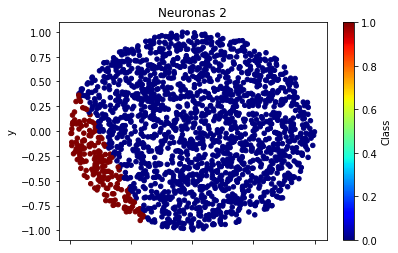

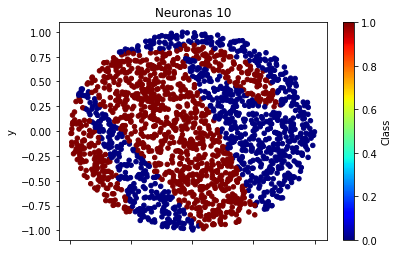

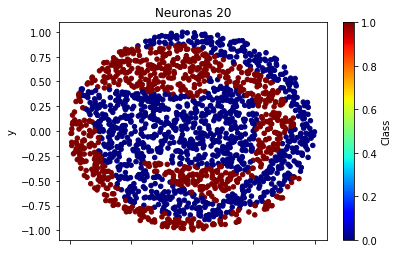

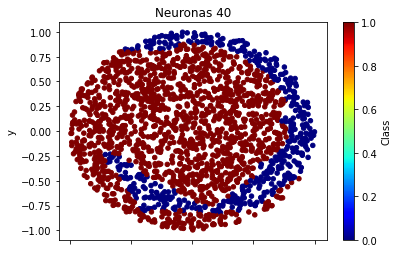

In [5]:
def ej1():
    train = espirales_anidadas.generate_points_c(600)
    train_data = train.loc[ : , ['x', 'y'] ]
    
    train_target = train.loc[:, 'Class']
    test = espirales_anidadas.generate_points_c(2000)
    X_train, X_val, y_train, y_val = train_test_split(train_data, train_target, test_size=0.2, random_state=0)
    X_test = test.loc[ : , ['x', 'y'] ]
    y_test = test.loc[:, 'Class']

    evaluaciones = 1000
    epocas = 20
    eta = 0.1 # lr
    alfa = 0.9 # m

    n_neuronas = [2, 10, 20, 40]

    for nn in n_neuronas:
        r = MLPClassifier(hidden_layer_sizes=(nn,), 
            activation='logistic', 
            solver='sgd', 
            alpha=0.0, 
            batch_size=1, 
            learning_rate='constant', 
            learning_rate_init=eta,
            momentum=alfa,
            nesterovs_momentum=False,
            tol=0.0,
            warm_start=True,
            max_iter=epocas
        )
        red, error_train, error_val, error_test = entrenar_red_clasificacion(r, evaluaciones, X_train, y_train, X_val, y_val, test.loc[ : , ['x', 'y'] ], test.loc[:, 'Class'])
        y_pred_test = red.predict(test.loc[ : , ['x', 'y'] ])
        graficar_predicciones(test.loc[ : , ['x', 'y'] ], y_pred_test, 'Class', f"Neuronas {nn}")

ej1()


Observaciones:

Si bien realizamos los entrenamientos con distinta cantidad de neuronas en la capa intermedia, luego de correr el bloque de código repetidas veces, no podemos ver ningún caso que se acerque al espiral que se debería de obtener. Los resultados obtenidos no son significativos.

## Ejercicio 2

ITER
ITER
   Eta  Alfa  Test Error
0  0.1     0    0.199928


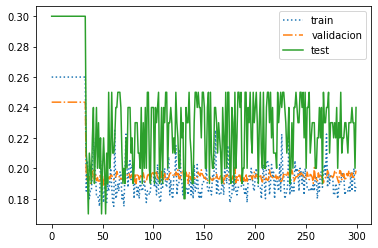

In [13]:
def ej2():
    patrones = 500 # cantidad de patrones tomada del conjunto de entrenamiento
    patrones_train = 400 # patrones usados para entrenar
    patrones_val = 100 # patrones usados para validar
    patrones_test = 2000 # patrones para testear
    # Leemos los datos del dataframe
    data_cols = ['x', 'y', 'Class']
    data_df = pd.read_csv('dos_elipses.data', names=data_cols)

    # Separamos los datos
    sample_df = data_df.sample(n = patrones)
    X_train, X_val, y_train, y_val = train_test_split(
        sample_df.loc[ : , ['x', 'y'] ], 
        sample_df.loc[ : , ['Class'] ], 
        test_size=((patrones_val * 100) / patrones) / 100, # nos da la proporcion de ejemplos para el conj de validacion 
        random_state=0
    )

    test_cols = ['x', 'y', 'Class']
    test_df = pd.read_csv('dos_elipses.test', names=test_cols)

    neuronas = 6 # cantidad de neuronas en la capa intermedia
    evaluaciones = 300
    epocas = 50

    etas = [0.1] # valores para learning rate
    alfas = [0] # valores para momentum

    entrenamientos = 2 # valor promedio que usaremos para el error (ejecuciones)

    errores_train = []
    errores_val = []
    errores_test = []
    mean_error_train = []
    mean_error_val = []
    mean_error_test = []
    error_train = []
    error_val = []
    error_test = []
    best_error = None
    best_eta = None
    best_alfa = None
    best_errores = None

    for eta in etas:
        for alfa in alfas:
            errores_train = []
            errores_val = []
            errores_test = []
            mean_error_train = []
            mean_error_val = []
            mean_error_test = []
            for i in range(0, entrenamientos):
                print('ITER')
                r = MLPClassifier(hidden_layer_sizes=(neuronas,), 
                    activation='logistic', 
                    solver='sgd', 
                    alpha=0.0, 
                    batch_size=1, 
                    learning_rate='constant', 
                    learning_rate_init=eta,
                    momentum=alfa,
                    nesterovs_momentum=False,
                    tol=0.0,
                    warm_start=True,
                    max_iter=epocas
                )
                red, error_train, error_val, error_test = entrenar_red_clasificacion(
                    r, 
                    evaluaciones,
                    X_train, 
                    y_train, 
                    X_val, 
                    y_val, 
                    test_df.loc[ : , ['x', 'y'] ], 
                    test_df.loc[:, 'Class']
                )
               
                errores_train = error_train
                errores_val = error_val
                errores_test = error_test
            
            # Calculamos promedio de los errores
            mean_error_train.append(sum(errores_train)/(len(errores_train)))
            mean_error_val.append(sum(errores_val)/(len(errores_val)))
            current_error = sum(errores_test)/(len(errores_test))
            mean_error_test.append(current_error)
            # Si conseguimos un mejor error de test lo guardamos
            if best_error is None or current_error < best_error:
                best_error = current_error
                best_alfa = alfa
                best_eta = eta
                best_error = (error_train, error_test, error_val)

    # Información para la tabla
    info = {'Eta' : etas, 'Alfa' : alfas, 'Test Error' : mean_error_test}
    print(pd.DataFrame(info))
    graficar_errores(best_error[0], best_error[1], best_error[2], evaluaciones)

    
     
    

ej2()

Conclusion:

ayuda :(

## Ejercicio 3

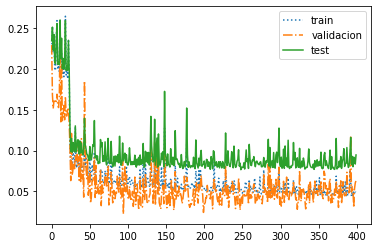

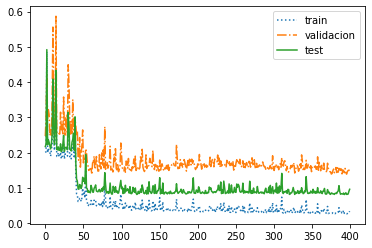

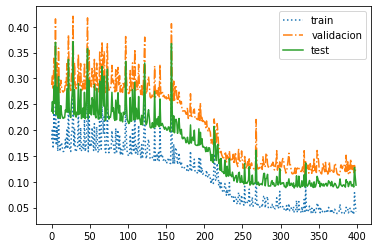

In [19]:
def ej3():
    eta = 0.01 # lr
    alfa = 0.9 # m
    evaluaciones = 400
    epocas = 50
    neuronas = 30

    data_cols = ['x', 'y', 'z', 'w', 'u', 'Val']
    train_data = pd.read_csv('ikeda.data', names=data_cols, delim_whitespace=True)
    test_data = (pd.read_csv('ikeda.test', names=data_cols, delim_whitespace=True)).sample(n = 2000)

    test_sizes = [0.05, 0.25, 0.5]
    for size in test_sizes:
        X_train, X_val, y_train, y_val = train_test_split(
            train_data.loc[ : , ['x', 'y', 'z', 'w', 'u'] ], 
            train_data.loc[ : , ['Val'] ], 
            test_size=size, # nos da la proporcion de ejemplos para el conj de validacion 
            random_state=0
        )

        r = MLPRegressor(hidden_layer_sizes=(neuronas,), 
                activation='logistic', 
                solver='sgd', 
                alpha=0.0, 
                batch_size=1, 
                learning_rate='constant', 
                learning_rate_init=eta,
                momentum=alfa,
                nesterovs_momentum=False,
                tol=0.0,
                warm_start=True,
                max_iter=epocas
        )

        red, error_train, error_val, error_test = entrenar_red_regresion(
            r, 
            evaluaciones,
            X_train, 
            y_train, 
            X_val, 
            y_val, 
            test_data.loc[ : , ['x', 'y', 'z', 'w', 'u'] ], 
            test_data.loc[:, 'Val']
        )

        graficar_errores(error_train, error_val, error_test, evaluaciones)
        

ej3()

## Ejercicio 4

In [ ]:
def ej4():
    pass

ej4()

## Ejercicio 5

In [ ]:
def ej5():
    pass

ej5()